### Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

# Para poder visualizar todas las columnas:
pd.set_option('display.max_columns',100)

# Para ver unicamente 1 decimales:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

### Datos utilizados

Se importan los datos con los resultados de la calificación de los modelos construidos en el capítulo anterior.

In [2]:
data = pd.read_csv('C:/Users/gusta/OneDrive/Documentos/Tesis/Datos/Datos_roi.csv') 

Se seleccionan las variables consideradas para diagnosticar el Síndrome Metabólico y las variables pronosticadas por los modelos para poder hacer el análisis de ROI.

In [3]:
var = ['SEXO','CC','GLU','PAS','PAD','HDL','TRI','SMet','HDL_Class','TRI_Class']
datos = data[var]

Se utilizan los parámetros establecidos en la Tabla 1.2 para complementar los resultados de los modelos.

In [4]:
# Circunferencia de cintura alterado:
datos['CC_Class'] = np.where(np.logical_or(np.logical_and(datos.SEXO == 'M', datos.CC >= 90),
                                           np.logical_and(datos.SEXO == 'F', datos.CC >= 80)),
                             1, 0)

# Presión arterial alta:
datos['Pres_Class'] = np.where(np.logical_and(datos.PAD >= 85, datos.PAS >= 130), 1, 0)

# Glucosa alterada:
datos['Glu_Class'] = np.where(datos.GLU >= 100, 1, 0)

Para determinar si el paciente tiene Síndrome Metabólico tienen que estar presentes 3 o más de los 5 factores analizados.

In [5]:
datos['Sum_factores'] = datos['HDL_Class'] + datos['TRI_Class'] + datos['CC_Class'] + datos['Pres_Class'] + datos['Glu_Class']
    
datos['SMet_Class'] = np.where(datos.Sum_factores >= 3, 1, 0)

In [6]:
datos

,SEXO,CC,GLU,PAS,PAD,HDL,TRI,SMet,HDL_Class,TRI_Class,CC_Class,Pres_Class,Glu_Class,Sum_factores,SMet_Class
0,F,73.0,80,122,70,63,88,0,1,1,0,0,0,2,0
1,M,83.0,69,100,80,37,185,0,1,1,0,0,0,2,0
2,F,78.0,87,90,60,59,78,0,0,0,0,0,0,0,0
3,M,71.0,97,100,80,36,91,0,0,0,0,0,0,0,0
4,F,75.0,94,96,78,52,59,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,F,84.0,89,98,89,34,154,1,1,1,1,0,0,3,1
173,M,93.0,89,112,70,36,246,1,1,1,1,0,0,3,1
174,M,83.5,99,120,96,39,156,1,1,1,0,0,0,2,0
175,F,84.1,102,110,70,49,90,1,1,0,1,0,1,3,1


Se construye la matriz de confusión.

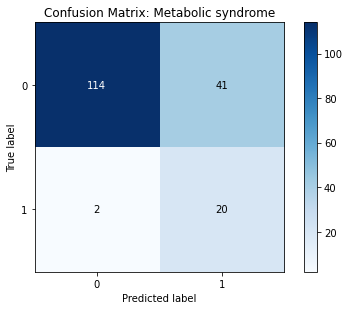

Precisión = 0.33
Sensibilidad = 0.91


In [8]:
SMet = datos['SMet']
SMet_Class = datos['SMet_Class']

matriz = confusion_matrix(y_true=SMet, y_pred=SMet_Class)
precision = precision_score(y_pred=SMet_Class, y_true=SMet)
recall = recall_score(y_pred=SMet_Class, y_true=SMet)

true_label = ['0','1']
predicted_label = ['0','1']

fig, ax = plt.subplots()

im, cbar = heatmap(matriz, true_label, true_label, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="")
texts = annotate_heatmap(im, valfmt="{x:.0f}")

fig.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix: Metabolic syndrome')
plt.show()

print('Precisión = %0.2f' % (precision))
print('Sensibilidad = %0.2f' % (recall))

### Funciones para contruir la matriz de confusión

In [7]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts  